In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\mk744\Downloads\Data visualisation\Label Encoding\treadmil-users.csv",
                header = None,
                usecols = [1,3,7],
                skiprows=[0])

df.columns = ['Age', 'Education', 'Income']

In [5]:
df

,Age,Education,Income
0,18,14,29562
1,19,15,31836
2,19,14,30699
3,19,12,32973
4,20,13,35247
...,...,...,...
175,40,21,83416
176,42,18,89641
177,45,16,90886
178,47,18,104581


# Feature Scaling

<AxesSubplot:xlabel='Age', ylabel='Density'>

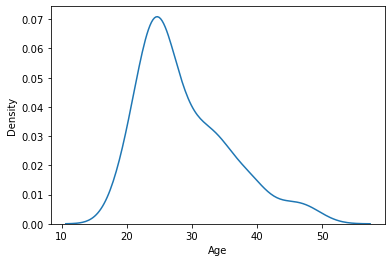

In [6]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

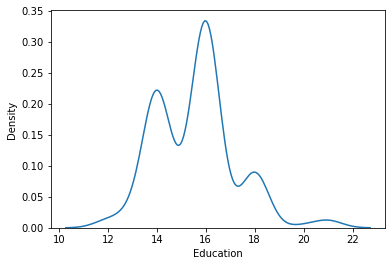

In [7]:
sns.kdeplot(df['Education'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

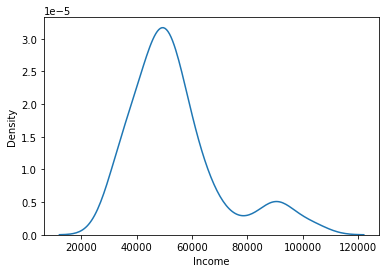

In [8]:
sns.kdeplot(df['Income'])

C:\Users\mk744\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='Income'>

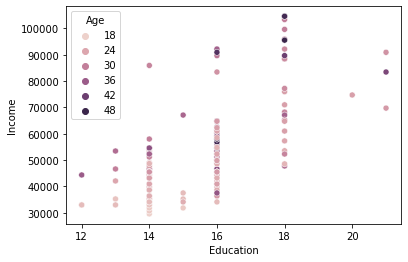

In [9]:
color_dict = {1: 'red', 2: 'green', 3 : 'blue'}
sns.scatterplot(df['Education'],df['Income'],hue = df['Age'])

In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Age', axis=1),
                                                   df['Age'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((126, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [13]:
np.round(X_train.describe(),1)

,Education,Income
count,126.0,126.0
mean,15.7,53708.8
std,1.7,16566.8
min,12.0,29562.0
25%,14.0,43490.2
50%,16.0,50596.5
75%,16.0,58839.8
max,21.0,104581.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Education,Income
count,126.0,126.0
mean,0.4,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.4,0.3
75%,0.4,0.4
max,1.0,1.0


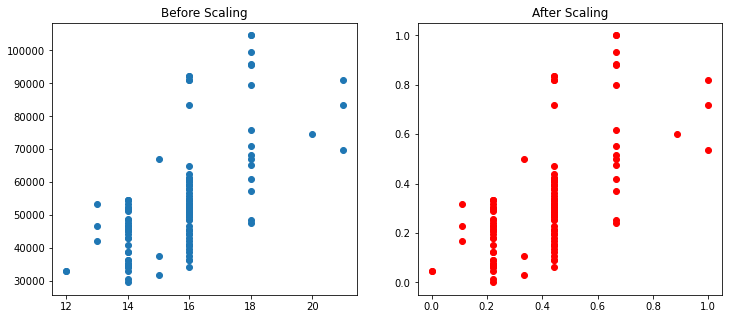

In [15]:
# Effect of Scaling
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Education'], X_train['Income'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Education'], X_train_scaled['Income'], color = 'red')
ax2.set_title('After Scaling')
plt.show()

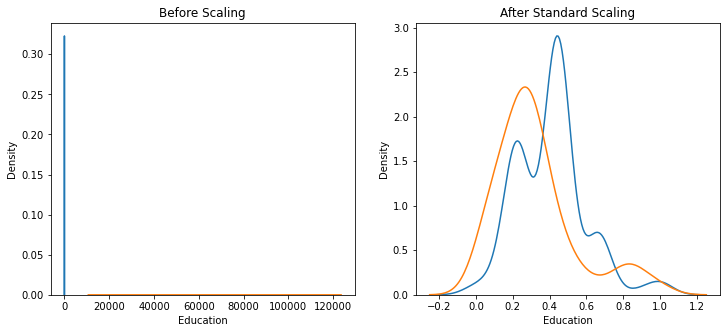

In [16]:
# to show what is the benifits of scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Education'], ax = ax1)
sns.kdeplot(X_train['Income'], ax = ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Education'], ax = ax2)
sns.kdeplot(X_train_scaled['Income'], ax = ax2)
plt.show()

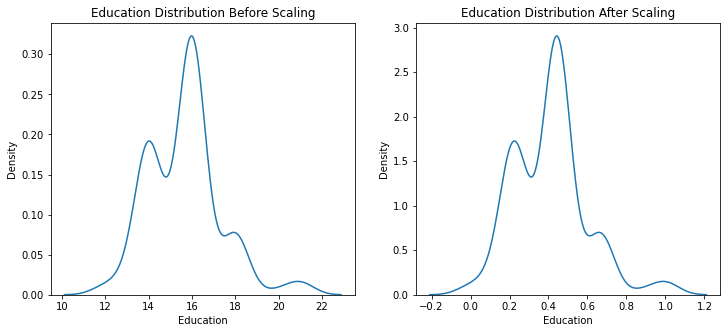

In [17]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Education Distribution Before Scaling')
sns.kdeplot(X_train['Education'], ax= ax1)

# After scaling
ax2.set_title('Education Distribution After Scaling')
sns.kdeplot(X_train_scaled['Education'], ax = ax2)
plt.show()

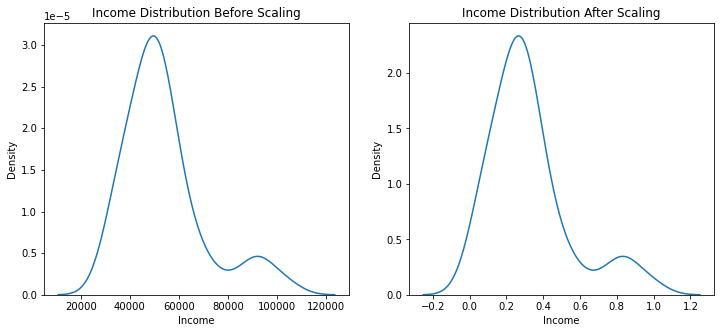

In [18]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Income Distribution Before Scaling')
sns.kdeplot(X_train['Income'], ax= ax1)

# After scaling
ax2.set_title('Income Distribution After Scaling')
sns.kdeplot(X_train_scaled['Income'], ax = ax2)
plt.show()

In [19]:
df = pd.read_csv(r"C:\Users\mk744\Downloads\documents\datafiles\Wine.csv",
                header = None,
                usecols = [1,3,7],
                skiprows=[0])

df.columns = ['Alcohol', 'Malic_Acid', 'Ash']

# Normalization

In [20]:
df

,Alcohol,Malic_Acid,Ash
0,1.71,15.6,0.28
1,1.78,11.2,0.26
2,2.36,18.6,0.30
3,1.95,16.8,0.24
4,2.59,21.0,0.39
...,...,...,...
173,5.65,20.5,0.52
174,3.91,23.0,0.43
175,4.28,20.0,0.43
176,2.59,20.0,0.53


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

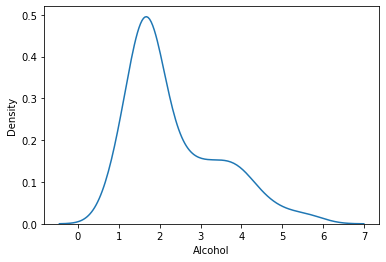

In [21]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic_Acid', ylabel='Density'>

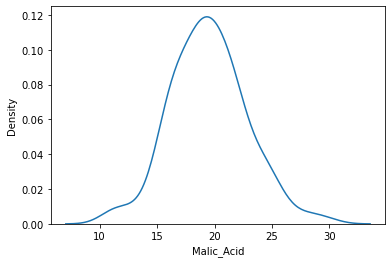

In [22]:
sns.kdeplot(df['Malic_Acid'])

<AxesSubplot:xlabel='Ash', ylabel='Density'>

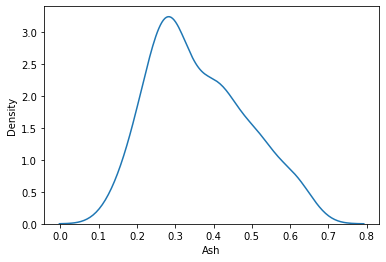

In [23]:
sns.kdeplot(df['Ash'])

C:\Users\mk744\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic_Acid'>

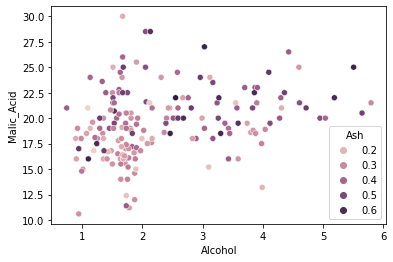

In [24]:
color_dict = {1: 'red', 2: 'green', 3 : 'blue'}
sns.scatterplot(df['Alcohol'],df['Malic_Acid'],hue = df['Ash'])

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Ash', axis=1),
                                                   df['Ash'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [28]:
np.round(X_train.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,2.4,19.5
std,1.1,3.6
min,0.9,10.6
25%,1.6,17.1
50%,1.9,19.4
75%,3.2,21.7
max,5.6,30.0


In [29]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,0.3,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.3
50%,0.2,0.5
75%,0.5,0.6
max,1.0,1.0


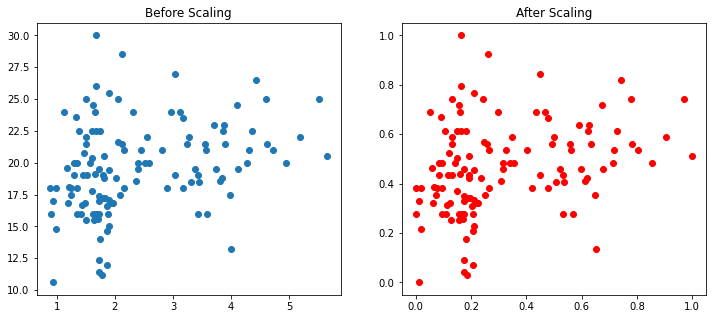

In [30]:
# Effect of Scaling
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic_Acid'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_Acid'], color = 'red')
ax2.set_title('After Scaling')
plt.show()

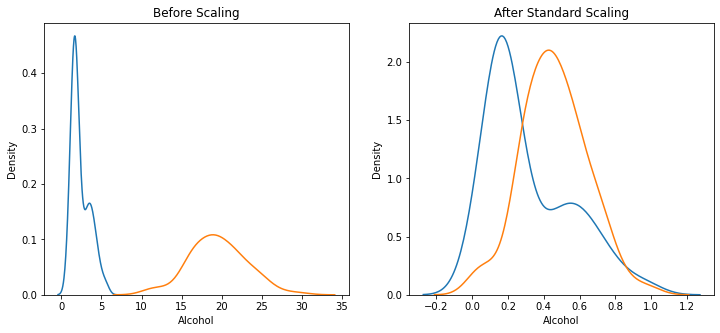

In [31]:
# to show what is the benifits of scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic_Acid'], ax = ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic_Acid'], ax = ax2)
plt.show()

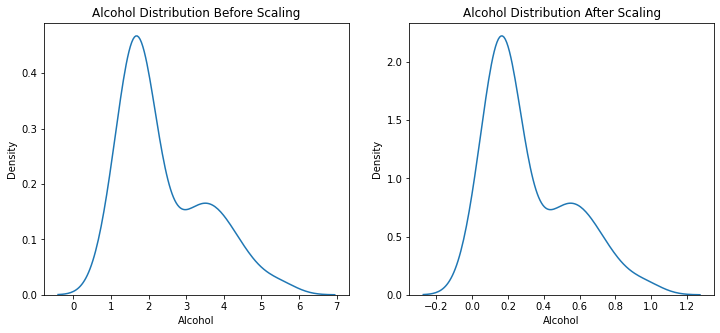

In [32]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax= ax1)

# After scaling
ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
plt.show()

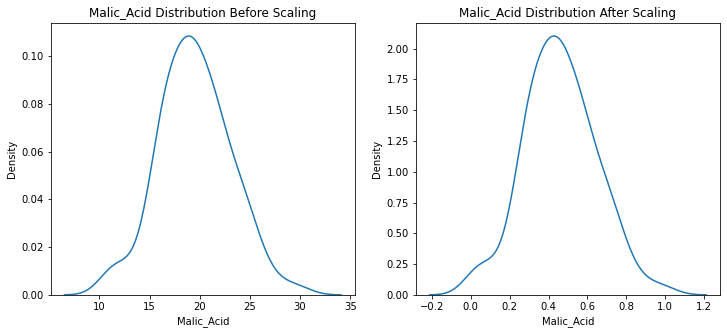

In [33]:
# Comparision of Distributions

# Before scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Malic_Acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic_Acid'], ax= ax1)

# After scaling
ax2.set_title('Malic_Acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic_Acid'], ax = ax2)
plt.show()

# MaxAbsScaler

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv(r"C:\Users\mk744\Downloads\documents\datafiles\Automobile+29.csv")

In [36]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [37]:
df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [38]:
df.dtypes

symboling                int64
normalized_losses        int64
make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm                 int64
city_mpg                 int64
highway_mpg              int64
price                    int64
dtype: object

In [39]:
X = df.iloc[:, [10,16]]


In [40]:
X.head()

,length,engine_size
0,168.8,130
1,168.8,130
2,171.2,152
3,176.6,109
4,176.6,136


In [41]:
y = df.iloc[:, 11]

In [42]:
y.head()

0    64.1
1    64.1
2    65.5
3    66.2
4    66.4
Name: width, dtype: float64

In [43]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [45]:
X_train.head()

,length,engine_size
116,157.3,98
100,184.6,181
167,176.2,146
200,188.8,141
48,159.1,91


In [46]:
scaler = MaxAbsScaler().fit(X_train)

In [47]:
print(scaler)

MaxAbsScaler()


In [48]:
scaler.max_abs_

array([208.1, 326. ])

In [49]:
scaler.scale_

array([208.1, 326. ])

In [50]:
X_train.describe()

,length,engine_size
count,150.000000,150.000000
mean,174.610667,127.693333
std,13.028720,43.712752
min,141.100000,61.000000
25%,166.800000,98.000000
50%,173.300000,120.000000
75%,186.600000,141.000000
max,208.100000,326.000000


# Transform

In [51]:
scaler.transform(X_train)

array([[0.75588659, 0.3006135 ],
       [0.88707352, 0.55521472],
       [0.84670831, 0.44785276],
       [0.90725613, 0.43251534],
       [0.76453628, 0.2791411 ],
       [0.82508409, 0.33435583],
       [0.89716482, 0.36809816],
       [0.85439692, 0.37423313],
       [0.94666026, 0.64110429],
       [0.89716482, 0.41104294],
       [0.86592984, 0.29754601],
       [0.75588659, 0.3006135 ],
       [0.81162902, 0.46319018],
       [0.83373378, 0.33128834],
       [0.85439692, 0.37423313],
       [0.81066795, 0.3006135 ],
       [0.75588659, 0.28220859],
       [0.80394041, 0.27607362],
       [0.90725613, 0.43251534],
       [0.79913503, 0.3006135 ],
       [0.83133109, 0.33742331],
       [0.9082172 , 0.64110429],
       [0.90725613, 0.43251534],
       [0.80394041, 0.3006135 ],
       [0.84959154, 0.40490798],
       [0.79913503, 0.3006135 ],
       [0.90725613, 0.43251534],
       [0.85776069, 0.55521472],
       [0.90725613, 0.39877301],
       [0.84670831, 0.44785276],
       [0.

In [52]:
X_train_scaled = scaler.transform(X_train)

In [53]:
print(X_train_scaled)

[[0.75588659 0.3006135 ]
 [0.88707352 0.55521472]
 [0.84670831 0.44785276]
 [0.90725613 0.43251534]
 [0.76453628 0.2791411 ]
 [0.82508409 0.33435583]
 [0.89716482 0.36809816]
 [0.85439692 0.37423313]
 [0.94666026 0.64110429]
 [0.89716482 0.41104294]
 [0.86592984 0.29754601]
 [0.75588659 0.3006135 ]
 [0.81162902 0.46319018]
 [0.83373378 0.33128834]
 [0.85439692 0.37423313]
 [0.81066795 0.3006135 ]
 [0.75588659 0.28220859]
 [0.80394041 0.27607362]
 [0.90725613 0.43251534]
 [0.79913503 0.3006135 ]
 [0.83133109 0.33742331]
 [0.9082172  0.64110429]
 [0.90725613 0.43251534]
 [0.80394041 0.3006135 ]
 [0.84959154 0.40490798]
 [0.79913503 0.3006135 ]
 [0.90725613 0.43251534]
 [0.85776069 0.55521472]
 [0.90725613 0.39877301]
 [0.84670831 0.44785276]
 [0.87313791 0.55521472]
 [0.75588659 0.27607362]
 [0.84863047 0.33435583]
 [0.84670831 0.44785276]
 [0.90725613 0.43251534]
 [0.84382508 0.37423313]
 [0.90725613 0.43251534]
 [0.8125901  0.33742331]
 [0.92599712 0.41717791]
 [0.85439692 0.37423313]


In [54]:
scaler = MaxAbsScaler().fit(X_test)

In [55]:
print(scaler)

MaxAbsScaler()


In [56]:
scaler.max_abs_

array([198.9, 234. ])

In [57]:
scaler.scale_

array([198.9, 234. ])

In [58]:
X_test.describe()

,length,engine_size
count,51.000000,51.000000
mean,172.996078,124.470588
std,9.975569,34.676420
min,157.300000,70.000000
25%,167.500000,97.000000
50%,172.400000,110.000000
75%,176.200000,149.000000
max,198.900000,234.000000


In [59]:
scaler.transform(X_test)

array([[0.93866264, 0.51282051],
       [0.8858723 , 0.62393162],
       [0.88888889, 0.7008547 ],
       [0.79084967, 0.39316239],
       [0.8728004 , 0.46153846],
       [0.79084967, 0.38461538],
       [0.94419306, 0.68803419],
       [0.96882856, 0.55982906],
       [0.88185018, 0.47008547],
       [0.83107089, 0.41452991],
       [0.87078934, 0.66666667],
       [0.94922071, 0.73931624],
       [0.90648567, 1.        ],
       [0.84816491, 0.41880342],
       [0.79084967, 0.38461538],
       [0.92810458, 0.77350427],
       [0.85319256, 0.39316239],
       [0.79084967, 0.38461538],
       [0.86475616, 0.46153846],
       [0.84816491, 0.41880342],
       [0.83107089, 0.41452991],
       [0.86676722, 0.52136752],
       [0.79084967, 0.38461538],
       [0.92257416, 0.73076923],
       [0.86475616, 0.46153846],
       [0.86676722, 0.52136752],
       [1.        , 0.64957265],
       [0.82151835, 0.39316239],
       [0.87179487, 0.51282051],
       [0.8858723 , 0.62393162],
       [0.

In [60]:
X_test_scaled = scaler.transform(X_test)

In [61]:
print(X_test_scaled)

[[0.93866264 0.51282051]
 [0.8858723  0.62393162]
 [0.88888889 0.7008547 ]
 [0.79084967 0.39316239]
 [0.8728004  0.46153846]
 [0.79084967 0.38461538]
 [0.94419306 0.68803419]
 [0.96882856 0.55982906]
 [0.88185018 0.47008547]
 [0.83107089 0.41452991]
 [0.87078934 0.66666667]
 [0.94922071 0.73931624]
 [0.90648567 1.        ]
 [0.84816491 0.41880342]
 [0.79084967 0.38461538]
 [0.92810458 0.77350427]
 [0.85319256 0.39316239]
 [0.79084967 0.38461538]
 [0.86475616 0.46153846]
 [0.84816491 0.41880342]
 [0.83107089 0.41452991]
 [0.86676722 0.52136752]
 [0.79084967 0.38461538]
 [0.92257416 0.73076923]
 [0.86475616 0.46153846]
 [0.86676722 0.52136752]
 [1.         0.64957265]
 [0.82151835 0.39316239]
 [0.87179487 0.51282051]
 [0.8858723  0.62393162]
 [0.84917044 0.82905983]
 [0.88285571 0.47008547]
 [0.79084967 0.39316239]
 [0.83609854 0.41880342]
 [0.79084967 0.38461538]
 [0.85319256 0.39316239]
 [0.87983912 0.57264957]
 [0.8496732  0.2991453 ]
 [0.84917044 0.82905983]
 [0.87078934 0.66666667]


In [95]:
df = pd.read_csv(r'C:\Users\mk744\Downloads\Data visualisation\Label Encoding\salaries.csv')

In [96]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


# Ordinal Encoding And Label Encoding

In [97]:
X = df.iloc[:, [0,1,2]]

In [98]:
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[0,1]],df.iloc[:,2],test_size=0.2)

In [100]:
X_train

,company,job
8,abc pharma,business manager
12,facebook,business manager
5,google,computer programmer
14,facebook,computer programmer
1,google,sales executive
11,facebook,sales executive
3,google,business manager
4,google,computer programmer
6,abc pharma,sales executive
13,facebook,business manager


In [101]:
y_train

8     bachelors
12    bachelors
5       masters
14    bachelors
1       masters
11      masters
3       masters
4     bachelors
6       masters
13      masters
2     bachelors
9       masters
Name: degree, dtype: object

# Ordina Encoding

In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [103]:
oe = OrdinalEncoder(categories=[[ 'abc pharma','facebook',
                                 'google'],
                                ['business manager','computer programmer','sales executive']])

In [104]:
oe.fit(X_train)

OrdinalEncoder(categories=[['abc pharma', 'facebook', 'google'],
                           ['business manager', 'computer programmer',
                            'sales executive']])

In [105]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [106]:
X_train

array([[0., 0.],
       [1., 0.],
       [2., 1.],
       [1., 1.],
       [2., 2.],
       [1., 2.],
       [2., 0.],
       [2., 1.],
       [0., 2.],
       [1., 0.],
       [2., 0.],
       [0., 0.]])

In [107]:
oe.categories_

[array(['abc pharma', 'facebook', 'google'], dtype=object),
 array(['business manager', 'computer programmer', 'sales executive'],
       dtype=object)]

# Label Encoding

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()

In [110]:
le.fit(y_train)

LabelEncoder()

In [111]:
le.classes_

array(['bachelors', 'masters'], dtype=object)

In [112]:
y_train = le.transform(y_train)
y_test  = le.transform(y_test)

In [113]:
y_train

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])